## Ejercicio Clustering.
<br>1)Usando $X, y = make\_circles(n\_samples=400, factor=.3, noise=.05)$ crear un dataset.<br>




<br>a)Graficarlo, utilizando dos colores para las clases.<br>

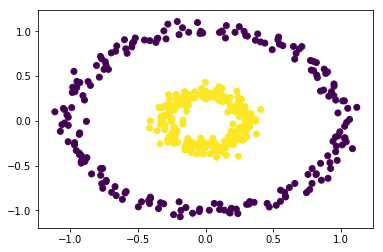

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)
plt.scatter(X[:,0], X[:,1], c=y)

<br>b)Usar K-means con k=2 para clasificarlo. Cuantifique el error cometido y grafique los resultados. ¿Cuántos paŕametros tiene el modelo ajustado?<br>

Parametros modelo: {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10, 'n_jobs': 1, 'precompute_distances': 'auto', 'random_state': 140, 'tol': 0.0001, 'verbose': 0}
El modelo acerto en un %49.5.


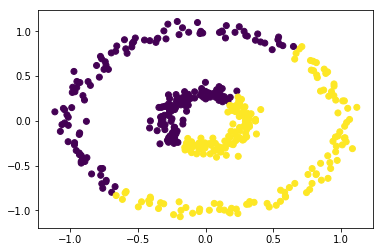

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

k=2
random_seed=140
clf_km = KMeans(n_clusters=k, random_state=random_seed)
labels_pred = clf_km.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_pred)
print('Parametros modelo: {0}'.format(clf_km.get_params()))
print('El modelo acerto en un %{0}.'.format(accuracy_score(y, labels_pred)*100))

<br>c)Clasificar por máxima verosimilitud una mezcla de 2 Gaussianas con matriz de covarianza general. Evalúe y grafique los resultados. ¿Cuántos parámetros tiene el modelo ajustado?<br>

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)>


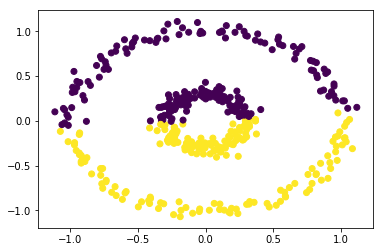

In [3]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
gmm_pred = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=gmm_pred)

print(gmm.get_params)

<br>d)Usar DBScan con diferentes parámetros. Cuantifique y grafique los resultados.<br>

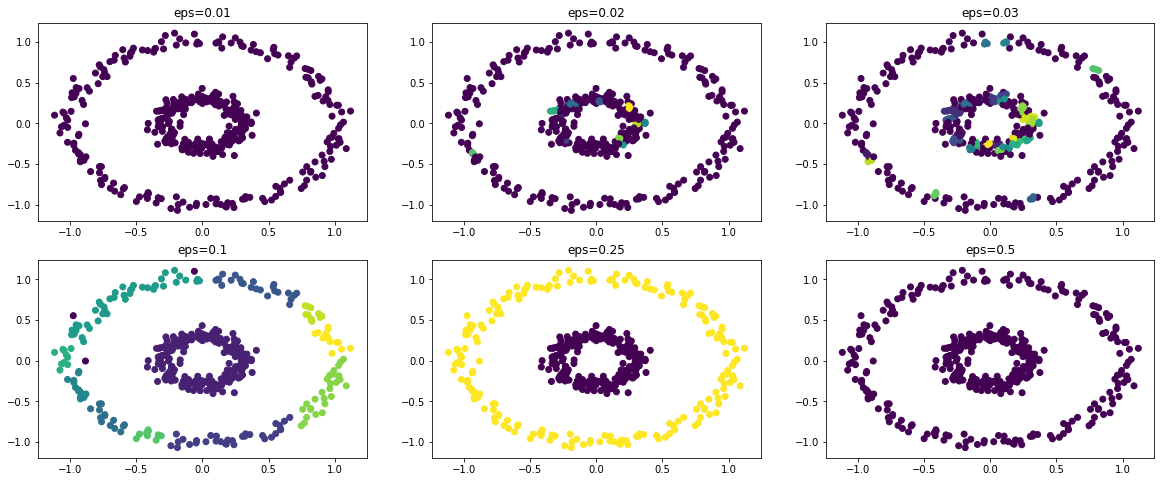

In [4]:
from sklearn.cluster import DBSCAN
minPts=3
fig, ax = plt.subplots(2, 3, figsize=(20,8))
i=0
j=0
for eps in [0.01, 0.02, 0.03, 0.1, 0.25, 0.5]:
    clf_DB = DBSCAN(eps, min_samples=minPts)
    ax[i][j].scatter(X[:,0], X[:,1], c=clf_DB.fit_predict(X))
    ax[i][j].set_title('eps={0}'.format(eps))
    if j==2: 
        j=0
        i+=1
    else:
        j+=1
    

<br>e)Describa lo que observa.<br>
<br>Se ve que K-Means y Gaussian Mixture no pueden lidiar con este tipo de distribucion de datos. El unico algoritmo que es util en estos casos els DBSCAN, pero hay que elegir cuidadosamente el epsilon para que clasifique de forma coherente los datos.<br>

<br>2)Usando $iris = datasets.load\_iris(); X = iris.data; y = iris.target$ como dataset, repetir el ejemplo anterior con 3 clases (k=3, 3 gaussianas).<br>

Text(0.5,1,'EM-GMM, 3 gaussianas')

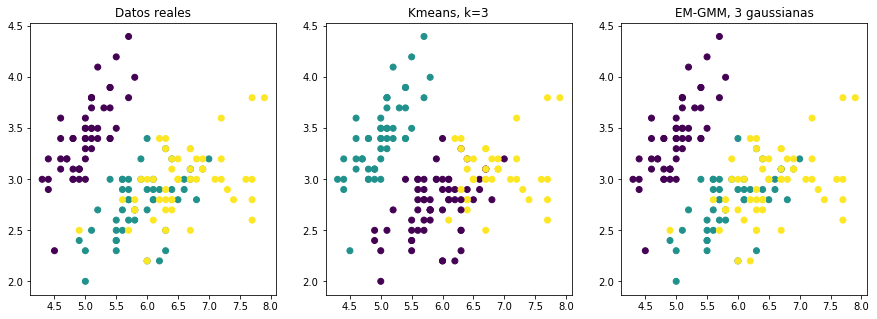

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data
y_2 = iris.target
k=3
clf_km_2a = KMeans(n_clusters=k)
gmm_2a = GaussianMixture(n_components=k)
gmm_2a.fit(X_2)

fig_2a, ax_2a = plt.subplots(1,3, figsize=(15,5)) 
ax_2a[0].scatter(X_2[:,0], X_2[:,1], c=y_2)
ax_2a[0].set_title('Datos reales')
ax_2a[1].scatter(X_2[:,0], X_2[:,1], c=clf_km_2a.fit_predict(X_2))
ax_2a[1].set_title('Kmeans, k={0}'.format(k))
ax_2a[2].scatter(X_2[:,0], X_2[:,1], c=gmm_2a.predict(X_2))
ax_2a[2].set_title('EM-GMM, {0} gaussianas'.format(k))

<br>a)¿Qué diferencias observa con el caso anterior? ¿A qué atribuye las diferencias?<br>
<br>Ambos algoritmos (KMeans y EM-GMM) pueden predecir correctamente los datos que estan mas separados, en la esquina superior izquierda. A K-Means le cuesta predecir los datos que estan mas superpuestos, pero EM-GMM hace un trabajo satisfactorio con estos. Esto se debe al tipo de asignamiento de un punto de dato a un cluster del K-Means. En cada iteracion, KMeans esta totalmente seguro que el punto analizado pertenece a cierto cluster, esto es $\textbf{Asignamiento duro}$. En cambio EM-GMM, posee un $\textbf{Asignamiento suave}$ donde en cada iteracion se calculan las probabilidades de que un punto pertenezca a una gaussiana u otra.<br>


<br>b)¿Si en el algoritmo EM-GMM usa gaussianas con matrices de covarianza diagonal, empeora el resultado? <br>
<br>c)¿Y si sólo permite son matrices diagonales?<br>
<br>Con la matriz de covarianza diagonal empeora un poco, ya que se esta pidiendo que las gaussianas modelen un comportamiento de los datos donde estos no estan para nada correlacionados (covarianzas = 0 de la gaussiana). La diferencia entre usar matrices de covarianzas diagonal o full es la cantida de parametros que debe buscar el algoritmo. Cuando la matriz es Diagonal, el algoritmo debe buscar solamente D parametros (los diagonales de la matriz), en cambio, si la matriz es "full" debe buscar (D^2-D)/2+D parametros de la matriz $\textbf{para cada gaussiana (n_components)}$.<br>
<br> En cuestion:<br>
<ul>
<li>cuando la matriz de covarianza es full, se obtiene un modelo mejor, pero a costo de tiempo computacional</li>
<li>cuando la matriz de covarianza es diagonal, se obtiene un modelo un poco peor, pero el costo de tiempo computacional es menor</li>
</ul>


EM-GMM, covarianza full [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2].
EM-GMM, covarianza diagonal [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2].
EM-GMM, covarianza full [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2].


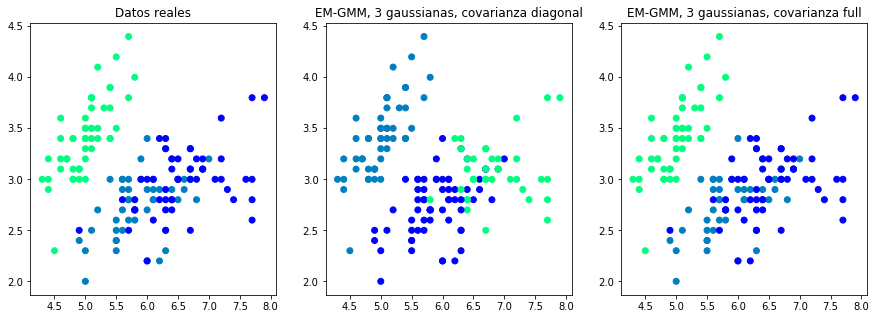

In [6]:
gmm_2b = GaussianMixture(n_components=k, covariance_type='diag')
gmm_2b.fit(X_2)

fig_2b, ax_2b = plt.subplots(1,3, figsize=(15,5)) 
ax_2b[0].scatter(X_2[:,0], X_2[:,1], c=y_2,  norm=plt.Normalize(), cmap='winter_r')
ax_2b[0].set_title('Datos reales')
ax_2b[1].scatter(X_2[:,0], X_2[:,1], c=gmm_2b.predict(X_2), norm=plt.Normalize(), cmap='winter_r')
ax_2b[1].set_title('EM-GMM, {0} gaussianas, covarianza diagonal'.format(k))
ax_2b[2].scatter(X_2[:,0], X_2[:,1], c=gmm_2a.predict(X_2), norm=plt.Normalize(), cmap='winter_r')
ax_2b[2].set_title('EM-GMM, {0} gaussianas, covarianza full'.format(k))

print('EM-GMM, covarianza full {0}.'.format(y_2))
print('EM-GMM, covarianza diagonal {0}.'.format(gmm_2b.predict(X_2)))
print('EM-GMM, covarianza full {0}.'.format(gmm_2a.predict(X_2)))


<br>3) Seleccion de modelos de mezcla de gaussianas mediante el criterio de información bayesiano $\href{https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_bayesiano}{BIC	}:$
En $\href{http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#}{plot\_gmm\_selection}$ encontrará un ejemplo en el que se usa el BIC como herramienta para la selección de modelos.<br>
<br>Adáptelo a dataset iris para responder las siguientes preguntas:<br>
<ul>
<li> El mejor modelo según el criterio BIC, ¿cuántas clases tiene?</li>
<li> El mejor modelo según el criterio BIC, ¿qué tipo de matriz de covarianza considera?</li>
</ul>
<br> Dados dos modelos, se prefiere el que tenga menor BIC. El BIC aumenta al aumentar la varianza del error cometido y al aumentar el numero de parametros libres a ajustar.<br>

In [7]:
gmm_full = GaussianMixture(n_components=3, covariance_type='full')
gmm_full.fit(X_2)
gmm_diag = GaussianMixture(n_components=3, covariance_type='diag')
gmm_diag.fit(X_2)
print('BIC de GMM usando matriz de covarianzas full: {0}'.format(gmm_full.bic(X_2)))
print('BIC de GMM usando matriz de covarianzas diagonal: {0}'.format(gmm_diag.bic(X_2)))

BIC de GMM usando matriz de covarianzas full: 582.4842410684013
BIC de GMM usando matriz de covarianzas diagonal: 746.7767997660015


<br>El mejor modelo fue el que tiene las matrices de covarianza llenas (full) y la cantidad de componentes fue 3.<br> 

<br> 4) Usando un dataset generado con el siguiente código, busque el mejor modelo de mezcla de tres gaussianas usando el criterio BIC.<br> 

In [8]:
import numpy as np

from sklearn.datasets.samples_generator import make_blobs

from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]

X_4, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X_4 = StandardScaler().fit_transform(X)

ValueError: c of shape (750,) not acceptable as a color sequence for x with size 400, y with size 400

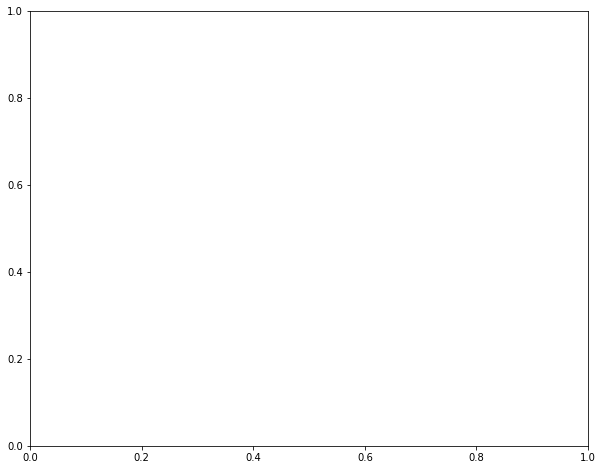

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X_4[:,0], X_4[:,1], c=labels_true, norm=plt.Normalize(), cmap='winter_r')
plt.title('Datos generados')

In [ ]:
k=3
gmm_full_4 = GaussianMixture(n_components=k, covariance_type='full')
gmm_full_4.fit(X_4)
gmm_diag_4 = GaussianMixture(n_components=k, covariance_type='diag')
gmm_diag_4.fit(X_4)
 print('BIC de GMM usando matriz de covarianzas full: {0}'.format(gmm_full_4.bic(X_4)))
print('BIC de GMM usando matriz de covarianzas diagonal: {0}'.format(gmm_diag_4.bic(X_4)))
fig, ax_4 = plt.subplots(1, 3, figsize=(25,8))
ax_4[0].scatter(X_4[:,0], X_4[:,1], c=labels_true, norm=plt.Normalize(), cmap='winter_r')
ax_4[0].set_title('Datos reales')

ax_4[1].scatter(X_4[:,0], X_4[:,1], c=gmm_full_4.predict(X_4), norm=plt.Normalize(), cmap='winter_r')
ax_4[1].set_title('Gaussianas con matrices de covarianza full.')

ax_4[2].scatter(X_4[:,0], X_4[:,1], c=gmm_diag_4.predict(X_4), norm=plt.Normalize(), cmap='winter_r')
ax_4[2].set_title('Gaussianas con matrices de covarianza diagonal.')

Graficamente, la diferencia ni se nota, la diferencia entre los BIC de cada modelo es muy pequeña, pero en este caso el modelo ganador es el de matrices de covarianza diagonal.

<br> Compare los aciertos del modelo seleccionado en el item anterior con la mejor clasificación que pueda obtener con DBScan.<br>

In [ ]:
minPts=3
exactitud_ls=list()
epsilons = [0.01, 0.1, 0.15, 0.2, 0.3]
for eps in epsilons:
    clf_DB_4 = DBSCAN(eps, min_samples=minPts)
    exactitud_ls = np.append(exactitud_ls, accuracy_score(labels_true, clf_DB_4.fit_predict(X_4)))
print('El modelo con mayor exactitud de DBSCAN fue con eps={0} y minPts={1}. La exactitud de este modelo fue del %{2}'.format(epsilons[np.argmax(exactitud_ls)], minPts, max(exactitud_ls)*100))

In [ ]:
#El metodo predict de GMM no asigna los numeros de label correspondientes a los labels verdaderos. Ejemplo: los label que son '0' en labels_true son '2' en la prediccion de labels de GMM
#Para usar una medida de exactitud tengo que ordenar bien los labels, la prediccion de labels del gmm con matrices diagonales tenia el label '2' cambiado por el label '0'.
#Luego puedo usar el accuracy_score para calcular la exactitud del algoritmo
pred_diag_4=gmm_diag_4.predict(X_4)
i=0
for pred in pred_diag_4:
    if pred==2:
        pred_diag_4[i]=0
    elif pred==0:
        pred_diag_4[i]=2
    i+=1
print('Exactitud del modelo EM-GMM con {0} gaussianas y matrices de covarianza diagonal es %{1}'.format(k, accuracy_score(labels_true, pred_diag_4)*100))

Se ve que el modelo de Gaussianas Mixtas con matrices de covarianza diagonales tuvo mayor cantidad de aciertos que el modelo de DBSCAN.